#### Adapted from Jonah Lee:
##### https://github.com/jonahjlee/blasttng-to-g3.git
##### notebooks/inspect_files.ipynb

# Inspecting Files

## Setup

In [4]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from spt3g import core
from spt3g import maps
from spt3g import calibration
from blasttng_to_g3 import g3_utils as ut
from astropy.coordinates import EarthLocation

In [5]:
data_dir = "planet_sims/sim_PCAM280_g3_Jupiter_d100"

filenames = os.path.join(data_dir, "Jupiter-*-*/frames-0000.g3")
files = sorted(glob.glob(filenames))

## File Content Overview
Print the frame types that are in each .g3 file

In [7]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=files)
pipe.Add(ut.FrameCounter)
pipe.Run()


Observation
Calibration
PipelineInfo
Scan (x27)
Observation
Calibration
PipelineInfo
Scan (x25)
Observation
Calibration
PipelineInfo
Scan (x25)
EndProcessing


## Full File Contents
Print full contents of the first .g3 file

In [9]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=files[0])
pipe.Add(core.Dump)
pipe.Run()

Frame (Observation) [
"observation_detector_sets" (spt3g.core.G3VectorVectorString) => 100 elements
"observation_name" (spt3g.core.G3String) => "Jupiter-0-0"
"observation_uid" (spt3g.core.G3Int) => 2915008787
"scan_el" (spt3g.core.G3Double) => 0.70808
"scan_el_astropy_units" (spt3g.core.G3String) => "deg"
"scan_el_units" (spt3g.core.G3Int) => 6
"scan_max_az" (spt3g.core.G3Double) => 0.752667
"scan_max_az_astropy_units" (spt3g.core.G3String) => "rad"
"scan_max_az_units" (spt3g.core.G3Int) => 6
"scan_max_el" (spt3g.core.G3Double) => 0.70808
"scan_max_el_astropy_units" (spt3g.core.G3String) => "rad"
"scan_max_el_units" (spt3g.core.G3Int) => 6
"scan_min_az" (spt3g.core.G3Double) => 0.717773
"scan_min_az_astropy_units" (spt3g.core.G3String) => "rad"
"scan_min_az_units" (spt3g.core.G3Int) => 6
"scan_min_el" (spt3g.core.G3Double) => 0.70808
"scan_min_el_astropy_units" (spt3g.core.G3String) => "rad"
"scan_min_el_units" (spt3g.core.G3Int) => 6
"session_class" (spt3g.core.G3String) => "toast.ins

## Observation Frame

In [11]:
# Get the first Observation frame
obsframe_grabber = ut.FirstFrameGrabber(core.G3FrameType.Observation)

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=files)
pipe.Add(obsframe_grabber)
pipe.Run()

obs_frame = obsframe_grabber.first_frame

print("\nObservation Frame: ", obs_frame)


Observation Frame:  Frame (Observation) [
"observation_detector_sets" (spt3g.core.G3VectorVectorString) => 100 elements
"observation_name" (spt3g.core.G3String) => "Jupiter-0-0"
"observation_uid" (spt3g.core.G3Int) => 2915008787
"scan_el" (spt3g.core.G3Double) => 0.70808
"scan_el_astropy_units" (spt3g.core.G3String) => "deg"
"scan_el_units" (spt3g.core.G3Int) => 6
"scan_max_az" (spt3g.core.G3Double) => 0.752667
"scan_max_az_astropy_units" (spt3g.core.G3String) => "rad"
"scan_max_az_units" (spt3g.core.G3Int) => 6
"scan_max_el" (spt3g.core.G3Double) => 0.70808
"scan_max_el_astropy_units" (spt3g.core.G3String) => "rad"
"scan_max_el_units" (spt3g.core.G3Int) => 6
"scan_min_az" (spt3g.core.G3Double) => 0.717773
"scan_min_az_astropy_units" (spt3g.core.G3String) => "rad"
"scan_min_az_units" (spt3g.core.G3Int) => 6
"scan_min_el" (spt3g.core.G3Double) => 0.70808
"scan_min_el_astropy_units" (spt3g.core.G3String) => "rad"
"scan_min_el_units" (spt3g.core.G3Int) => 6
"session_class" (spt3g.core.G3

## Calibration Frame

In [13]:
# Get the first Calibration frame
calframe_grabber = ut.FirstFrameGrabber(core.G3FrameType.Calibration)

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=files)
pipe.Add(calframe_grabber)
pipe.Run()

cal_frame = calframe_grabber.first_frame

print("\nCalibration Frame: ", cal_frame)


Calibration Frame:  Frame (Calibration) [
"el_noise_model" (spt3g.core.G3VectorUnsignedChar) => 47652 elements
"el_noise_model_class" (spt3g.core.G3String) => "toast.noise.Noise"
"focalplane" (spt3g.core.G3VectorUnsignedChar) => 26402 elements
"noise_model" (spt3g.core.G3VectorUnsignedChar) => 54016 elements
"noise_model_class" (spt3g.core.G3String) => "toast.noise_sim.AnalyticNoise"
]


## Scan Frames
Get the first and last Scan frame

In [15]:
first_scan_grabber = ut.FirstFrameGrabber(core.G3FrameType.Scan)
last_scan_grabber = ut.LastFrameGrabber(core.G3FrameType.Scan)

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=files)
pipe.Add(first_scan_grabber)
pipe.Add(last_scan_grabber)
pipe.Run()

# store the frames for analysis
first_scan_frame = first_scan_grabber.first_frame
last_scan_frame = last_scan_grabber.last_frame

print("\nFirst Scan Frame: ", first_scan_frame)
print("\nLast Scan Frame: ", last_scan_frame)

Found the last frame with type: Scan!
The frame is now stored in <blasttng_to_g3.g3_utils.tools.LastFrameGrabber object at 0x110982f00>'s last_frame attribute.

First Scan Frame:  Frame (Scan) [
"compress_signal_w2_p0000_PC_f280_A_gain" (spt3g.core.G3Double) => 39241.8
"compress_signal_w2_p0000_PC_f280_A_offset" (spt3g.core.G3Double) => 0.00567294
"compress_signal_w2_p0000_PC_f280_A_units" (spt3g.core.G3Int) => 4
"compress_signal_w2_p0000_PC_f280_B_gain" (spt3g.core.G3Double) => 38173.6
"compress_signal_w2_p0000_PC_f280_B_offset" (spt3g.core.G3Double) => 0.00477359
"compress_signal_w2_p0000_PC_f280_B_units" (spt3g.core.G3Int) => 4
"compress_signal_w2_p0034_PC_f280_A_gain" (spt3g.core.G3Double) => 39442.9
"compress_signal_w2_p0034_PC_f280_A_offset" (spt3g.core.G3Double) => 0.0069173
"compress_signal_w2_p0034_PC_f280_A_units" (spt3g.core.G3Int) => 4
"compress_signal_w2_p0034_PC_f280_B_gain" (spt3g.core.G3Double) => 38740
"compress_signal_w2_p0034_PC_f280_B_offset" (spt3g.core.G3Double) =

## Printing values from specific keys

In [17]:
radec = first_scan_frame['shared_radec_deg']
#print(core.G3VectorDouble.Description(radec)) #Prints full array
#print(core.G3VectorDouble.Summary(radec)) #Prints array length

time = first_scan_frame['times']
#print(core.G3VectorTime.Description(time)) #Prints full array
#print(core.G3VectorDouble.Summary(time)) #Prints array length

signal = first_scan_frame['signal']
#print(set(core.G3TimestreamMap.keys(signal))) #Prints keys for the signal TimestreamMap, keys are detector names
#print(signal.units) #Prints signal units
#print(signal.start) #Prints signal start time
#print(signal.stop) #Prints signal stop time
#print(signal.sample_rate) #Prints signal sample rate
#print(signal.n_samples) #Prints length of signal array

#kids = signal.keys()
#for kid in kids:
#    print(signal[kid])

pos = cal_frame['focalplane']
#print(core.G3VectorUnsignedChar.Description(pos)) #Prints full array

names = obs_frame['observation_detector_sets']
#print(type(names[0]))

## Boresight Scan Pattern

<Figure size 800x600 with 0 Axes>

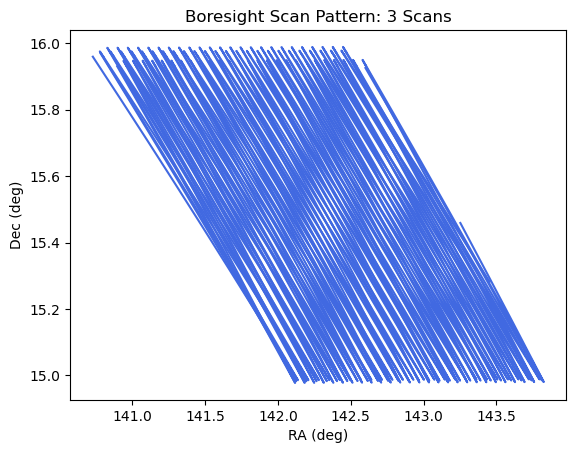

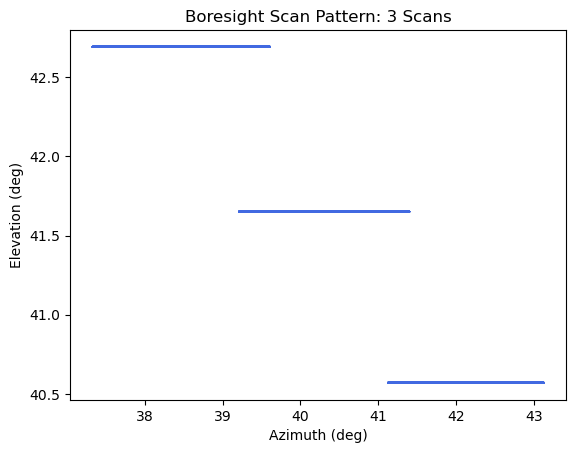

In [19]:
plt.figure(figsize=(8, 6))
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# Loop through all files and plot RA vs. Dec to show scan pattern
for fname in files:
    #print(f"Processing: {fname}")
    for frame in core.G3File(fname):
        if frame.type == core.G3FrameType.Scan:
            if "shared_radec_deg" not in frame:
                continue  # Skip frames without pointing info

            # RA/Dec in deg
            ra = frame["shared_radec_deg"][::2]
            dec = frame["shared_radec_deg"][1::2]
            
            ax1.plot(ra, dec, color='royalblue')            
            
            az = np.asarray(frame["shared_azimuth"])
            el = np.asarray(frame["shared_elevation"])

            ax2.plot(np.rad2deg(az), np.rad2deg(el), color='royalblue')


ax1.set(xlabel="RA (deg)", ylabel="Dec (deg)")
ax1.set_title(f"Boresight Scan Pattern: {len(files)} Scans")

ax2.set(xlabel="Azimuth (deg)", ylabel="Elevation (deg)")
ax2.set_title(f"Boresight Scan Pattern: {len(files)} Scans")
plt.show()

### Converting Az/El to RA/Dec
Note: az and el are in radians

In [21]:
def azel_to_radec(az, el, lat_s, lon_s, alt, t):
    site_loc = EarthLocation(lat=lat_s, lon=lon_s, height=alt)
    ra_ts, dec_ts = maps.convert_azel_to_radec(az, el, site_loc, mjd=t)
    return ra_ts, dec_ts

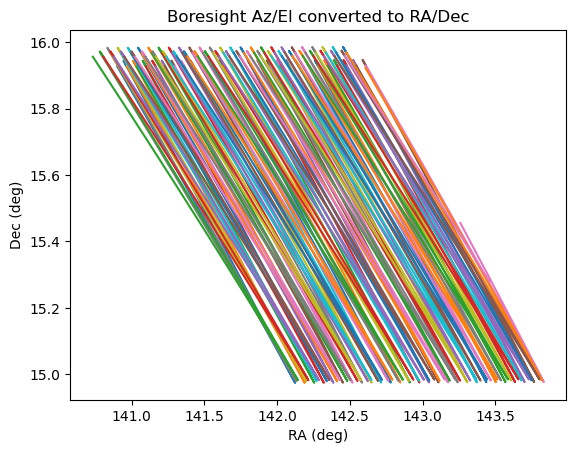

In [22]:
from astropy.time import Time

for frame in core.G3File(files):
    if frame.type == core.G3FrameType.Observation:
        # Get site location
        site_lat = frame["site_lat_deg"]
        site_lon = frame["site_lon_deg"]
        site_alt = frame["site_alt_m"]
    if frame.type == core.G3FrameType.Scan:
        az_bore = np.array(frame["shared_azimuth"]) #radians
        el_bore = np.array(frame["shared_elevation"]) #radians
        
        times = frame["times"] #G3VectorTime (ns since Unix epoch)

        # Convert time to seconds
        unix_times = np.array([t.time / 1e8 for t in times])
        t_astropy = Time(unix_times, format='unix').mjd

        # Convert Az/El to RA/Dec
        ra, dec = azel_to_radec(az_bore, el_bore, site_lat, site_lon, site_alt, t_astropy)

        # Convert back to degrees
        ra_deg = np.rad2deg(ra)
        dec_deg = np.rad2deg(dec)

        plt.plot(ra_deg,dec_deg)

plt.title("Boresight Az/El converted to RA/Dec")
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.show()

## Focalplane Layout

Columns available in focalplane table: ('name', 'quat', 'xy_offset', 'wafer_slot', 'band', 'pixel', 'pol', 'psi_pol', 'gamma', 'fwhm', 'psd_fmin', 'psd_fknee', 'psd_alpha', 'psd_net', 'bandcenter', 'bandwidth', 'index', 'uid', 'pol_angle', 'pol_efficiency', 'pol_leakage')

Detector Names: [b'w2_p0000_PC_f280_A' b'w2_p0000_PC_f280_B' b'w2_p0034_PC_f280_A'
 b'w2_p0034_PC_f280_B' b'w2_p0069_PC_f280_A' b'w2_p0069_PC_f280_B'
 b'w2_p0104_PC_f280_A' b'w2_p0104_PC_f280_B' b'w2_p0141_PC_f280_A'
 b'w2_p0141_PC_f280_B' b'w2_p0176_PC_f280_A' b'w2_p0176_PC_f280_B'
 b'w2_p0211_PC_f280_A' b'w2_p0211_PC_f280_B' b'w2_p0246_PC_f280_A'
 b'w2_p0246_PC_f280_B' b'w2_p0281_PC_f280_A' b'w2_p0281_PC_f280_B'
 b'w2_p0317_PC_f280_A' b'w2_p0317_PC_f280_B' b'w2_p0352_PC_f280_A'
 b'w2_p0352_PC_f280_B' b'w2_p0387_PC_f280_A' b'w2_p0387_PC_f280_B'
 b'w2_p0422_PC_f280_A' b'w2_p0422_PC_f280_B' b'w2_p0458_PC_f280_A'
 b'w2_p0458_PC_f280_B' b'w2_p0494_PC_f280_A' b'w2_p0494_PC_f280_B'
 b'w2_p0529_PC_f280_A' b'w2_p0529_PC_f28

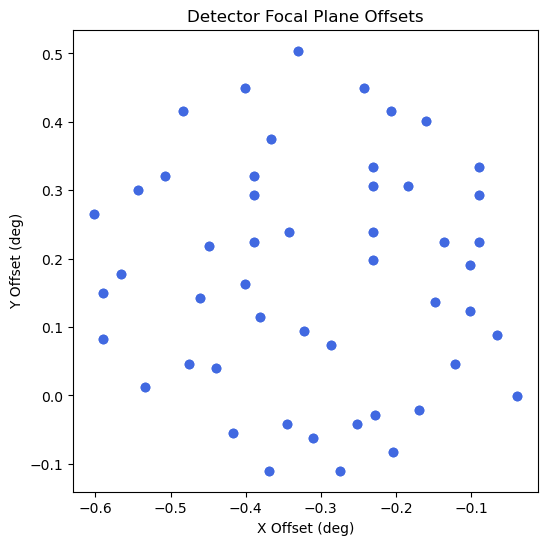

In [24]:
import h5py
import io

# Convert the G3VectorUnsignedChar to raw bytes
raw_bytes = bytes(cal_frame["focalplane"])

# Wrap it into a file-like object
fp_buffer = io.BytesIO(raw_bytes)

with h5py.File(fp_buffer, 'r') as f:
    fp_table = f["focalplane"]
    print("Columns available in focalplane table:", fp_table.dtype.names)
    names = fp_table["name"][:]
    quat = fp_table["quat"][:]
    off_xy = fp_table["xy_offset"][:]
    pixel = fp_table["pixel"][:]
    

#print(f"Loaded {len(names)} detectors.")
print("\nDetector Names:",names)
print("Quaternion", np.shape(quat))
#print("xy offsets", off_xy)

# Separate x and y offsets
x_off = off_xy[:,0]
y_off = off_xy[:,1]


# Offsets dictionary
offsets = {
    "det_names": names, # list of detector names, length #dets
    "x_off": x_off,     # (#dets)
    "y_off": y_off,     # (#dets)
    "quat": quat,       # [w,x,y,z] (#dets)
}

plt.figure(figsize=(6, 6))
for det in range(len(names)):
    plt.scatter(x_off[det], y_off[det], color='royalblue')
    #plt.annotate(names[det],  # Text for the label
    #            (x_off[det], y_off[det]),  # Coordinates to position the label
    #             xytext=(5, 5),  # Distance from text to points (x,y)
    #             textcoords='offset points',  # How to position the text
    #             ha='center',  # Horizontal alignment
    #             va='bottom')  # Vertical alignment

plt.xlabel("X Offset (deg)")
plt.ylabel("Y Offset (deg)")
plt.title("Detector Focal Plane Offsets")
plt.show()

## Correcting for detector offsets

1. Convert boresight quaternions to vector first format (detector offsets are already in this format)
2. Multiply quaternions (Hamilton product) to apply detetor offset to boresight
- (boresight*offset) => applies rotation in detector plane then rotates boresight (i.e. translates boresight vector to detector position)

3. Compute isometric angles (theta, phi, psi)
4. Compute RA/Dec in degrees

In [27]:
PI = np.pi
PI_2 = np.pi / 2.0
TWOPI = 2.0 * np.pi
EPS = np.finfo(float).eps

def to_vector_first(q):
    """Convert scalar-first [w,x,y,z] -> vector-first [x,y,z,w]"""
    return np.array([q[1], q[2], q[3], q[0]])

def qa_normalize_inplace(q):
    q = np.asarray(q, dtype=float)
    n = np.linalg.norm(q)
    if n == 0:
        raise ValueError("Zero-norm quaternion")
    q = q / n

def qa_rotate(q_in, v_in):
    """The input quaternion has already been normalized."""

    xw =  q_in[3] * q_in[0]
    yw =  q_in[3] * q_in[1]
    zw =  q_in[3] * q_in[2]
    x2 = -q_in[0] * q_in[0]
    xy =  q_in[0] * q_in[1]
    xz =  q_in[0] * q_in[2]
    y2 = -q_in[1] * q_in[1]
    yz =  q_in[1] * q_in[2]
    z2 = -q_in[2] * q_in[2]

    v_out = [0,0,0]
    
    v_out[0] = 2 * ((y2 + z2) * v_in[0] + (xy - zw) * v_in[1] + (yw + xz) * v_in[2]) + v_in[0]

    v_out[1] = 2 * ((zw + xy) * v_in[0] + (x2 + z2) * v_in[1] + (yz - xw) * v_in[2]) + v_in[1]

    v_out[2] = 2 * ((xz - yw) * v_in[0] + (xw + yz) * v_in[1] + (x2 + y2) * v_in[2]) + v_in[2]

    return v_out


def qa_to_iso(q):
    """
    Convert quaternions to ISO spherical coordinates (theta, phi, psi).

    Args:
        q : ndarray of shape (N, 4)
            Array of normalized quaternions.

    Returns:
        theta, phi, psi : ndarrays of shape (N,)
    """
    q = np.asarray(q, dtype=np.float64)
    n_elem = q.shape[0]

    theta = np.zeros(n_elem)
    phi = np.zeros(n_elem)
    psi = np.zeros(n_elem)

    xaxis = np.array([1.0, 0.0, 0.0])
    zaxis = np.array([0.0, 0.0, 1.0])

    for i in range(n_elem):
        qtemp = q[i].copy()
        qa_normalize_inplace(qtemp)

        dir_vec = qa_rotate(qtemp, zaxis)
        orient = qa_rotate(qtemp, xaxis)

        if abs(abs(dir_vec[2]) - 1.0) < EPS:
            # Near a pole
            phi[i] = 0.0
            if dir_vec[2] >= 0.0:
                theta[i] = 0.0
                psi_y, psi_x = orient[1], orient[0]
            else:
                theta[i] = PI
                psi_y, psi_x = -orient[1], -orient[0]
        else:
            theta[i] = PI_2 - np.arcsin(dir_vec[2])
            phi[i] = np.arctan2(dir_vec[1], dir_vec[0])

            vm_x = dir_vec[2] * np.cos(phi[i])
            vm_y = dir_vec[2] * np.sin(phi[i])
            vm_z = -np.sqrt(1.0 - dir_vec[2]**2)

            psi_y = (
                dir_vec[0] * (vm_y * orient[2] - vm_z * orient[1])
                - dir_vec[1] * (vm_x * orient[2] - vm_z * orient[0])
                + dir_vec[2] * (vm_x * orient[1] - vm_y * orient[0])
            )

            psi_x = vm_x * orient[0] + vm_y * orient[1] + vm_z * orient[2]

        psi[i] = np.arctan2(psi_y, psi_x)
        if psi[i] > PI:
            psi[i] -= TWOPI
        if psi[i] <= -PI:
            psi[i] += TWOPI

    return theta, phi, psi


def qa_mult(p, q):
    """Hamilton product for single quaternions, vector-first [x,y,z,w]."""

    qa_normalize_inplace(p)
    qa_normalize_inplace(q)
    
    x1,y1,z1,w1 = p
    x2,y2,z2,w2 = q
    x = w1*x2 + x1*w2 + y1*z2 - z1*y2
    y = w1*y2 - x1*z2 + y1*w2 + z1*x2
    z = w1*z2 + x1*y2 - y1*x2 + z1*w2
    w = w1*w2 - x1*x2 - y1*y2 - z1*z2
    return np.array([x,y,z,w])

#### Plot RA/Dec and signal for one detector

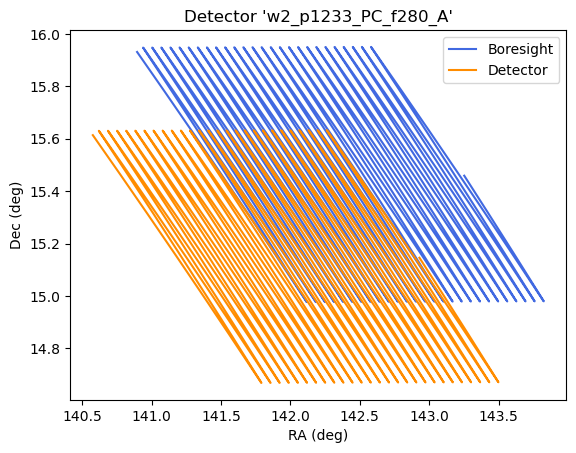

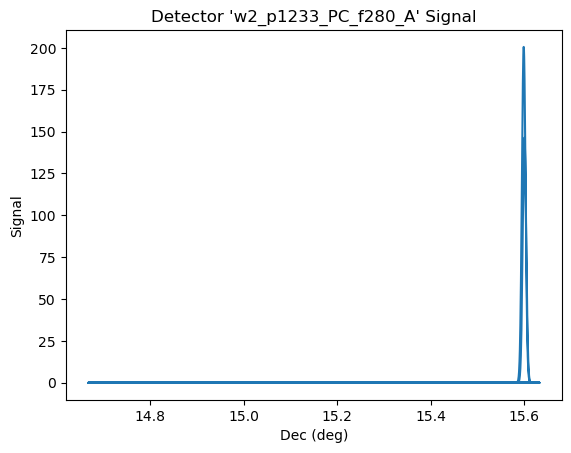

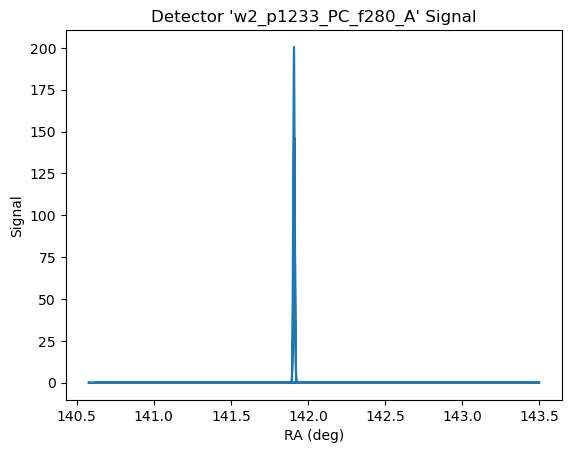

In [29]:
all_ra = []
all_dec = []
all_ra_det = []
all_dec_det = []
all_signal_det = []

# Choose detetor
det_id = 70

for frame in core.G3File(files[0]):
    if frame.type == core.G3FrameType.Calibration:
        # Convert the G3VectorUnsignedChar to raw bytes
        raw_bytes = bytes(frame["focalplane"])

        # Wrap it into a file-like object
        fp_buffer = io.BytesIO(raw_bytes)

        with h5py.File(fp_buffer, 'r') as f:
            focalplane = f["focalplane"]
            names = focalplane["name"][:]
            det_offset = focalplane["quat"][:] # array of quaternions with shape (#dets, 4)
        
    if frame.type == core.G3FrameType.Scan:
        # Select detector name
        det_name = str(names[det_id], "utf-8")
        
        # Get Detector Signal
        raw_signal = frame['signal']
                
        # raw samples
        y_raw = np.asarray(raw_signal[det_name], dtype=float)

        # per-frame reconstruction
        gain_key = f"compress_signal_{det_name}_gain"
        offset_key = f"compress_signal_{det_name}_offset"
        if gain_key in frame and offset_key in frame:
            gain = float(frame[gain_key])
            offset = float(frame[offset_key])
            reconstructed_y = y_raw/gain + offset
        
        all_signal_det.extend(reconstructed_y)
        
        boresight_radec = np.asarray(frame["shared_boresight_radec"]) # array of quaternions with shape (#samples, 4)


        for i in range(len(boresight_radec)):
            # Convert to vector first notation [x,y,z,w] (Note: offset is already in vector first notation, only need to convert boresight)
            q_bore = to_vector_first(boresight_radec[i])

            # Multiply quaternions to apply detetor offset to boresight
            q = qa_mult(q_bore, det_offset[det_id])

            # Compute isometric angles
            theta_b, phi_b, psi_b = qa_to_iso([q_bore])
            theta, phi, psi = qa_to_iso([q])

            # Compute RA/Dec
            ra_b  = np.degrees(phi_b) % 360
            dec_b = 90 - np.degrees(theta_b)
            ra  = np.degrees(phi) % 360
            dec = 90 - np.degrees(theta)

            all_ra_det.append(ra)
            all_dec_det.append(dec)
            
            all_ra.append(ra_b) # shape (#samples, #dets)
            all_dec.append(dec_b) # shape (#samples, #dets)


plt.plot(all_ra, all_dec, label='Boresight', color='royalblue')
plt.plot(all_ra_det, all_dec_det, label='Detector', color='darkorange')
plt.title(f"Detector '{det_name}'")
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.legend()
plt.show()

plt.plot(all_dec_det,all_signal_det)
plt.title(f"Detector '{det_name}' Signal")
plt.xlabel("Dec (deg)")
plt.ylabel("Signal")
plt.show()

plt.plot(all_ra_det,all_signal_det)
plt.title(f"Detector '{det_name}' Signal")
plt.xlabel("RA (deg)")
plt.ylabel("Signal")
plt.show()

## Map with one detector for one .g3 file

In [31]:
print(np.shape(np.asarray(all_ra_det).ravel()))
print(np.shape(all_dec_det))
print(np.shape(all_signal_det))


(204960,)
(204960, 1)
(204960,)


In [32]:
import numpy as np

def make_sky_map(ra_dict, dec_dict, signal_dict, ra0, dec0, xlen=1.0, ylen=1.0, res=0.01):
    """
    Bin detector time-ordered data into a 2D sky map.

    Parameters
    ----------
    ra_dict : dict
        Mapping detector_id -> RA array (degrees)
    dec_dict : dict
        Mapping detector_id -> DEC array (degrees)
    signal_dict : dict
        Mapping detector_id -> timestream array
    ra0, dec0 : float
        Map center (degrees)
    xlen, ylen : float
        Map size in degrees (RA, DEC)
    res : float
        Pixel size in degrees
    """

    nx = int(xlen / res)
    ny = int(ylen / res)

    ra_edges = np.linspace(-xlen/2, xlen/2, nx+1) + ra0
    dec_edges = np.linspace(-ylen/2, ylen/2, ny+1) + dec0

    data = np.zeros((ny, nx), dtype=float)

    # bin into map
    data += np.histogram2d(dec_dict, ra_dict, bins=[dec_edges, ra_edges], weights=signal_dict)[0]

    return data, ra_edges, dec_edges


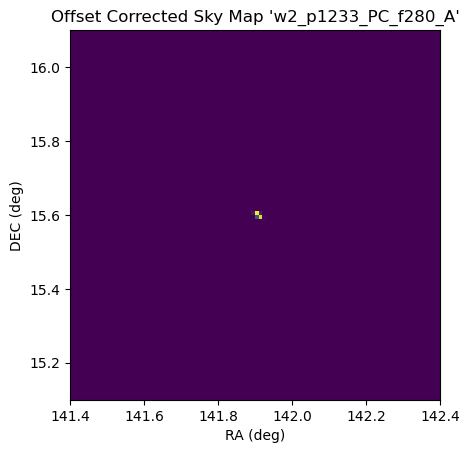

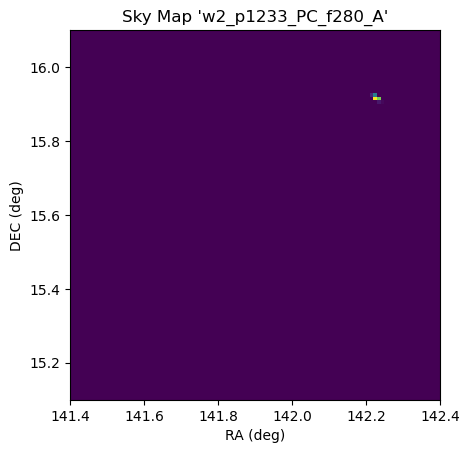

In [33]:
# Show offset corrected sky map
ra1 = np.asarray(all_ra_det).ravel()
dec1 = np.asarray(all_dec_det).ravel()

sky_map, ra_edges, dec_edges = make_sky_map(
    ra1, dec1, all_signal_det,
    ra0=141.9, dec0=15.6,
    xlen=1.0, ylen=1.0, res=0.01
)

import matplotlib.pyplot as plt
plt.imshow(sky_map, origin='lower', extent=[ra_edges[0], ra_edges[-1], dec_edges[0], dec_edges[-1]])
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.title(f"Offset Corrected Sky Map '{det_name}'")
plt.show()


# Show sky map (not offset corrected)
ra2 = np.asarray(all_ra).ravel()
dec2 = np.asarray(all_dec).ravel()

sky_map2, ra_edges2, dec_edges2 = make_sky_map(
    ra2, dec2, all_signal_det,
    ra0=141.9, dec0=15.6,
    xlen=1.0, ylen=1.0, res=0.01
)

import matplotlib.pyplot as plt
plt.imshow(sky_map2, origin='lower', extent=[ra_edges2[0], ra_edges2[-1], dec_edges2[0], dec_edges2[-1]])
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.title(f"Sky Map '{det_name}'")
plt.show()

## Combined sky map (100 detectors)

In [35]:
#Jupiter expected to be at Dec: 15.6deg and RA: 141.9deg

In [36]:
import numpy as np
import h5py, io
from scipy.spatial.transform import Rotation as R

all_signal = {}
all_ra = {}
all_dec = {}
boresight_ra = {}
boresight_dec = {}
det_offset_dict = {}

for frame in core.G3File(files):

    if frame.type == core.G3FrameType.Calibration:
        # Load focalplane and detector offsets
        fp_buffer = io.BytesIO(bytes(frame["focalplane"]))
        with h5py.File(fp_buffer, "r") as f:
            names = [n.decode("utf-8") for n in f["focalplane"]["name"][:]]
            quats = f["focalplane"]["quat"][:]  # shape (#dets, 4)
            det_offset_dict = {name: quat for name, quat in zip(names, quats)}
        continue

    if frame.type == core.G3FrameType.Scan:
        raw_signal = frame["signal"]
        kids = list(raw_signal.keys())

        # Load boresight quaternions (scalar-first [w,x,y,z])
        boresight_q = np.asarray(frame["shared_boresight_radec"])  # (Nsamp,4)
        Nsamp = len(boresight_q)

        # Convert boresight to vector-first [x,y,z,w] for scipy
        boresight_r = R.from_quat(boresight_q[:, [1,2,3,0]])

        # Compute boresight pointing vectors (z-axis)
        z_axis = np.array([0,0,1])
        bore_vectors = boresight_r.apply(z_axis)
        ra_b = np.degrees(np.arctan2(bore_vectors[:,1], bore_vectors[:,0])) % 360
        dec_b = np.degrees(np.arcsin(bore_vectors[:,2]))

        for kid in kids:
            # --- Signal ---
            y_raw = np.asarray(raw_signal[kid], float)
            gain_key = f"compress_signal_{kid}_gain"
            offset_key = f"compress_signal_{kid}_offset"
            if gain_key in frame and offset_key in frame:
                gain = float(frame[gain_key])
                offset = float(frame[offset_key])
                y = y_raw/gain + offset
            else:
                y = y_raw
            all_signal.setdefault(kid, []).append(y)

            # --- Detector offset ---
            det_q = det_offset_dict[kid]
            det_r = R.from_quat(det_q)
            # Apply offset: detector quaternion * boresight quaternion (vectorized)
            corrected_r = boresight_r * det_r
            det_vectors = corrected_r.apply(z_axis)
            ra_det = np.degrees(np.arctan2(det_vectors[:,1], det_vectors[:,0])) % 360
            dec_det = np.degrees(np.arcsin(det_vectors[:,2]))

            # Store
            all_ra.setdefault(kid, []).append(ra_det)
            all_dec.setdefault(kid, []).append(dec_det)
            boresight_ra.setdefault(kid, []).append(ra_b)
            boresight_dec.setdefault(kid, []).append(dec_b)

# Concatenate all frames
for det in all_signal:
    all_signal[det] = np.concatenate(all_signal[det])
    all_ra[det] = np.concatenate(all_ra[det])
    all_dec[det] = np.concatenate(all_dec[det])
    boresight_ra[det] = np.concatenate(boresight_ra[det])
    boresight_dec[det] = np.concatenate(boresight_dec[det])
    #print(det, len(all_signal[det]), len(all_ra[det]), len(all_dec[det]))


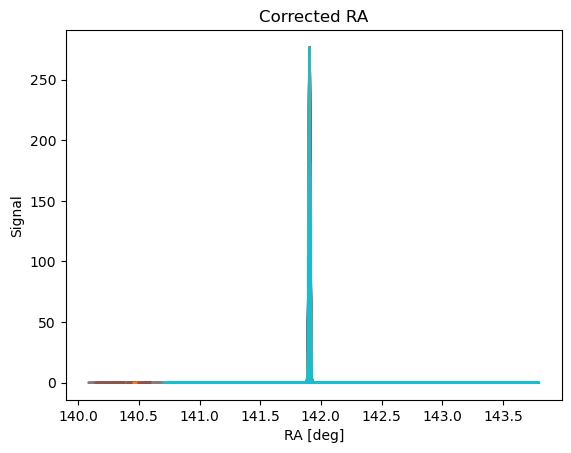

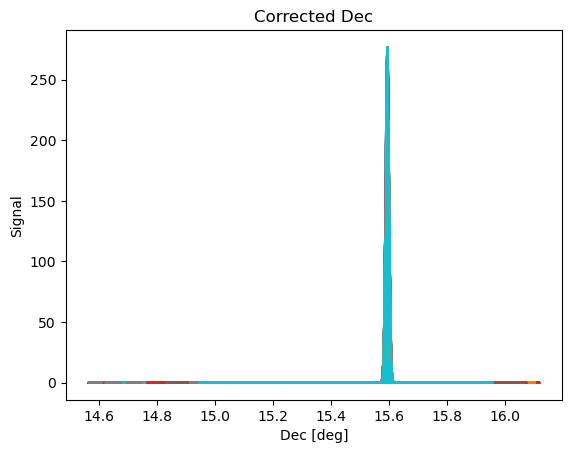

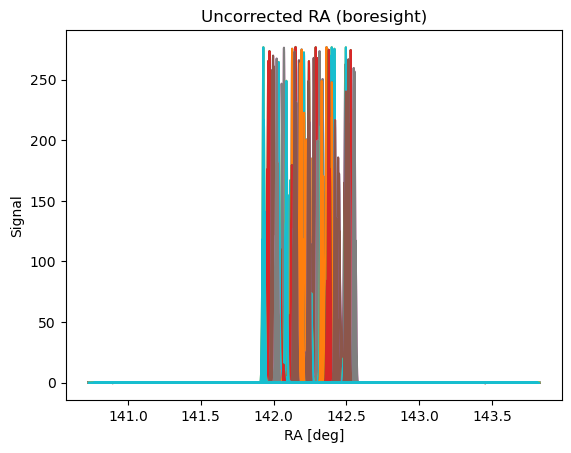

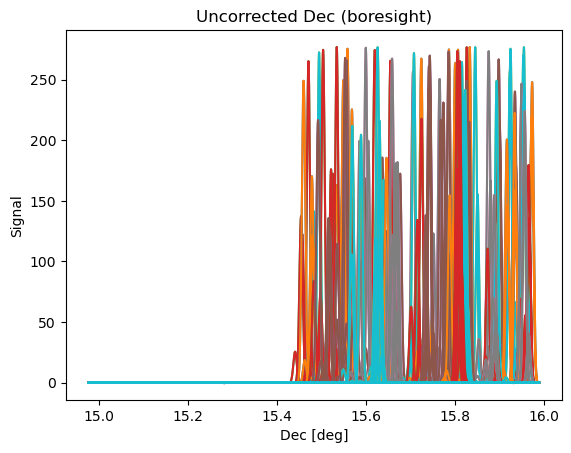

In [37]:
for det in all_ra:
    plt.plot(all_ra[det], all_signal[det])
plt.xlabel('RA [deg]')
plt.ylabel('Signal')
plt.title('Corrected RA')
plt.show()

for det in all_dec:
    plt.plot(all_dec[det], all_signal[det])
plt.xlabel('Dec [deg]')
plt.ylabel('Signal')
plt.title('Corrected Dec')
plt.show()


for det in boresight_ra:
    plt.plot(boresight_ra[det], all_signal[det])
plt.xlabel('RA [deg]')
plt.ylabel('Signal')
plt.title('Uncorrected RA (boresight)')
plt.show()

for det in boresight_dec:
    plt.plot(boresight_dec[det], all_signal[det])
plt.xlabel('Dec [deg]')
plt.ylabel('Signal')
plt.title('Uncorrected Dec (boresight)')
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def make_sky_map_multi(ra_dict, dec_dict, signal_dict, ra0, dec0, xlen=1.0, ylen=1.0, res=0.01):
    """
    Bin detector time-ordered data from multiple detectors into a 2D sky map.

    Parameters
    ----------
    ra_dict : dict
        Mapping detector_id -> RA array (degrees)
    dec_dict : dict
        Mapping detector_id -> DEC array (degrees)
    signal_dict : dict
        Mapping detector_id -> timestream array
    ra0, dec0 : float
        Map center (degrees)
    xlen, ylen : float
        Map size in degrees (RA, DEC)
    res : float
        Pixel size in degrees

    Returns
    -------
    data : 2D ndarray
        Sky map with summed detector contributions
    ra_edges, dec_edges : 1D ndarray
        Map bin edges in RA and DEC
    """
    
    nx = int(xlen / res)
    ny = int(ylen / res)
    
    ra_edges = np.linspace(-xlen/2, xlen/2, nx+1) + ra0
    dec_edges = np.linspace(-ylen/2, ylen/2, ny+1) + dec0
    
    data = np.zeros((ny, nx), dtype=float)
    
    # Loop over detectors and accumulate contributions
    for det in ra_dict.keys():
        ra = np.asarray(ra_dict[det]).ravel()
        dec = np.asarray(dec_dict[det]).ravel()
        signal = np.asarray(signal_dict[det]).ravel()
        
        data += np.histogram2d(dec, ra, bins=[dec_edges, ra_edges], weights=signal)[0]
    
    return data, ra_edges, dec_edges


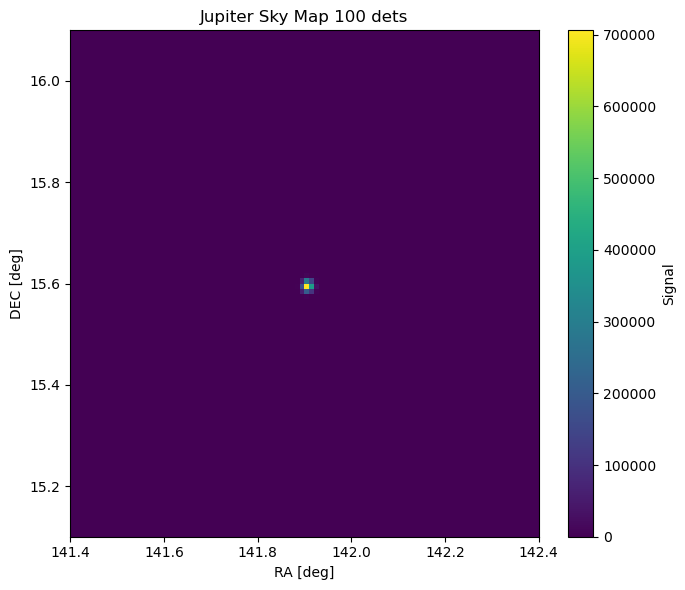

In [39]:
# Offset-corrected sky map
sky_map, ra_edges, dec_edges = make_sky_map_multi(
    all_ra, all_dec, all_signal,
    ra0=141.9, dec0=15.6,
    xlen=1.0, ylen=1.0, res=0.01
)

plt.figure(figsize=(7, 6))

im = plt.imshow(sky_map, origin='lower', extent=[ra_edges[0], ra_edges[-1], dec_edges[0], dec_edges[-1]], aspect="auto")
plt.colorbar(im, label="Signal")
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
plt.title(f"Jupiter Sky Map {len(all_ra)} dets")
plt.tight_layout()
plt.show()

### Final Pipeline


Observation
Calibration
PipelineInfo
Scan (x27)
Observation
Calibration
PipelineInfo
Scan (x25)
Observation
Calibration
PipelineInfo
Scan (x25)
EndProcessing
Plotting final map...


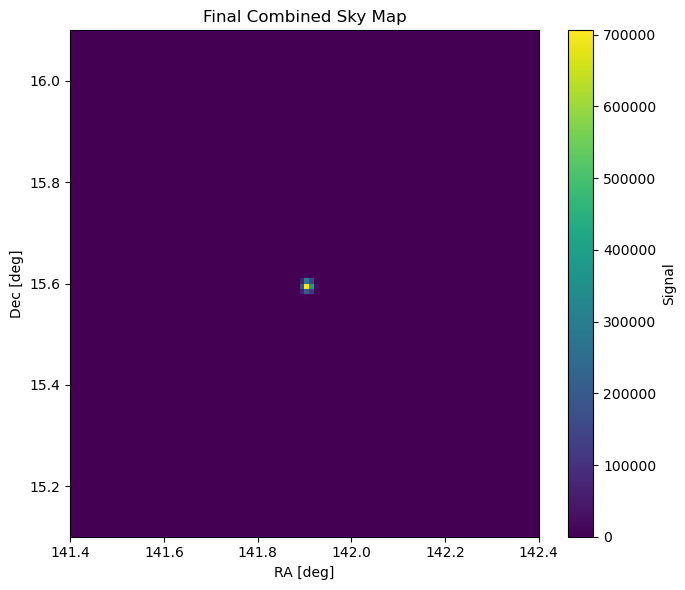

In [41]:
data_dir = "planet_sims/sim_PCAM280_g3_Jupiter_d100"

filenames = os.path.join(data_dir, "Jupiter-*-*/frames-0000.g3")
files = sorted(glob.glob(filenames))

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=files)
pipe.Add(ut.FrameCounter)
pipe.Add(ut.MapMaker,
         ra0=141.9,
         dec0=15.6,
         xlen=1.0,
         ylen=1.0,
         res=0.01)

# Run the pipeline
pipe.Run()
